# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_data = pd.merge(study_results, mouse_metadata, on='Mouse ID')

# Display the data table for preview
merged_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
merged_data['Mouse ID'].nunique()

249

In [19]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
# Identify duplicate rows based on 'Mouse ID' and 'Timepoint'
duplicates = merged_data[merged_data.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]

# Extract the unique Mouse ID for duplicates and convert it to an array
duplicate_mouse_ids = duplicates['Mouse ID'].unique()

# Display the array of duplicate mouse IDs
duplicate_mouse_ids


array(['g989'], dtype=object)

In [20]:
# Optional: Get all the data for the duplicate mouse ID.
# Get all the data for the duplicate mouse ID 'g989'
duplicate_mouse_data = merged_data.loc[merged_data['Mouse ID'] == 'g989']

# Display the data for the duplicate mouse ID
duplicate_mouse_data


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
duplicates = merged_data[merged_data.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
# Get the unique Mouse IDs with duplicates
duplicate_mouse_ids = duplicates['Mouse ID'].unique()
# Create a clean DataFrame by excluding the duplicate Mouse IDs
clean_data = merged_data[~merged_data['Mouse ID'].isin(duplicate_mouse_ids)]
clean_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
clean_data['Mouse ID'].nunique()

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
grouped_data = merged_data.groupby('Drug Regimen')['Tumor Volume (mm3)']
# mean, median, variance, standard deviation, and SEM of the tumor volume.
mean_tumor = grouped_data.mean()
median_tumor = grouped_data.median()
variance_tumor = grouped_data.var()
std_dev_tumor = grouped_data.std()
sem_tumor = grouped_data.sem()
# Assemble the resulting series into a single summary DataFrame.
summary_stats = pd.DataFrame({
    'Mean Tumor Volume': mean_tumor,
    'Median Tumor Volume': median_tumor,
    'Tumor Volume Variance': variance_tumor,
    'Tumor Volume Std. Dev.': std_dev_tumor,
    'Tumor Volume Std. Err.': sem_tumor
})
summary_stats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Using the aggregation method, produce the same summary statistics in a single line
summary_stats = merged_data.groupby('Drug Regimen').agg(
    mean=('Tumor Volume (mm3)', 'mean'),
    median=('Tumor Volume (mm3)', 'median'),
    var=('Tumor Volume (mm3)', 'var'),
    std=('Tumor Volume (mm3)', 'std'),
    sem=('Tumor Volume (mm3)', 'sem')
)
summary_stats.columns.name = 'Tumor Volume (mm3)'
summary_stats

Tumor Volume (mm3),mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<Axes: xlabel='Drug Regimen', ylabel='# of Observed Mouse Timepoints'>

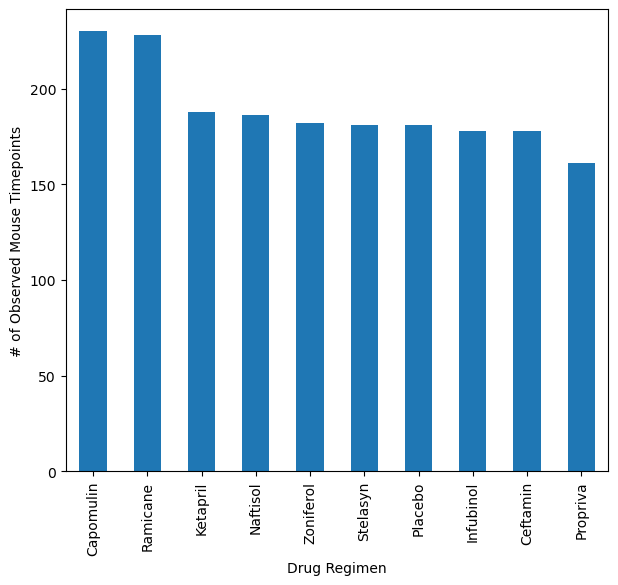

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
total_counts = merged_data['Drug Regimen'].value_counts()
total_counts.plot(
    kind='bar',
    figsize=(7, 6),
    xlabel='Drug Regimen',
    ylabel='# of Observed Mouse Timepoints'
)

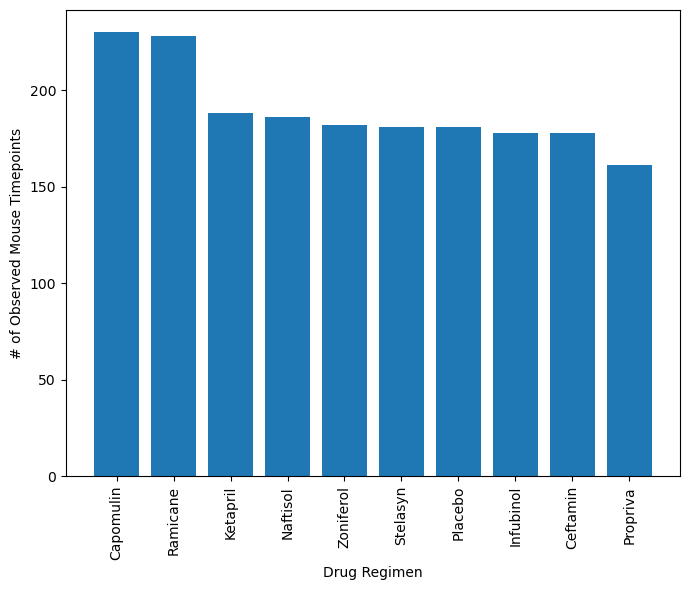

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
total_counts = merged_data['Drug Regimen'].value_counts()
plt.figure(figsize=(7, 6))
plt.bar(total_counts.index, total_counts.values)
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

<Axes: ylabel='count'>

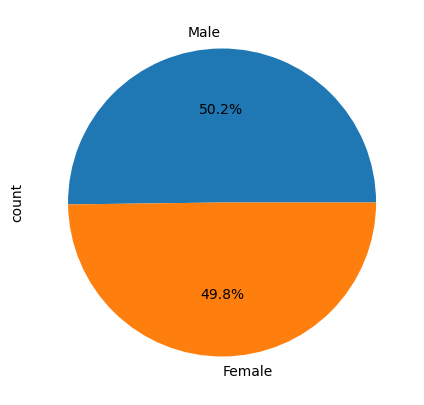

In [11]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study
# Get the unique mice with their gender
unique_mice = merged_data[['Mouse ID', 'Sex']].drop_duplicates()
# Make the pie chart
gender_distribution = unique_mice['Sex'].value_counts(normalize=True) * 100
gender_distribution = gender_distribution.reindex(['Male', 'Female'])
gender_distribution.plot.pie(
    autopct='%1.1f%%',
    startangle=0,  
    colors=['#1f77b4', '#ff7f0e'], 
    figsize=(5, 5),
    ylabel='count'
    
)

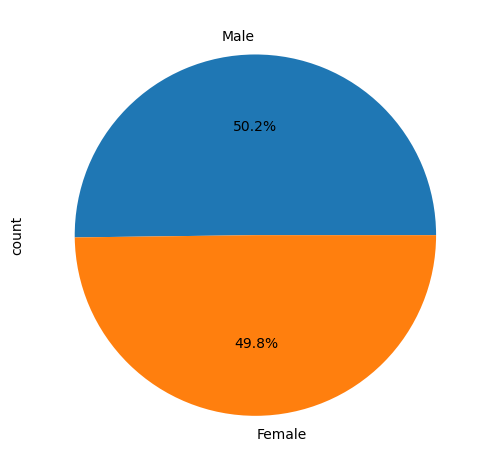

In [12]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study
# Get the unique mice with their gender
unique_mice = merged_data[['Mouse ID', 'Sex']].drop_duplicates()
# Make the pie chart
gender_distribution = unique_mice['Sex'].value_counts(normalize=True) * 100
gender_distribution = gender_distribution.reindex(['Male', 'Female'])
plt.figure(figsize=(5, 5))
plt.pie(
    gender_distribution,
    labels=gender_distribution.index,
    autopct='%1.1f%%',
    startangle=0,  
    colors=['#1f77b4', '#ff7f0e']
)
plt.ylabel('count')
plt.tight_layout()
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
selected_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
filtered_data = merged_data[merged_data['Drug Regimen'].isin(selected_regimens)]
max_timepoint = filtered_data.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume = pd.merge(max_timepoint, filtered_data, on=['Mouse ID', 'Timepoint'], how='left')



In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for treatment in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_volumes = final_tumor_volume.loc[final_tumor_volume['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
    
    # add subset
    tumor_vol_data.append(tumor_volumes)
    
    # Calculate the IQR for the tumor volumes
    quartiles = tumor_volumes.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq

    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    outliers = tumor_volumes[(tumor_volumes < lower_bound) | (tumor_volumes > upper_bound)]
    
    # Display the IQR analysis for each treatment
    print(f"{treatment} - IQR Analysis:")
    print(f"  Lower Quartile: {lowerq}")
    print(f"  Upper Quartile: {upperq}")
    print(f"  IQR: {iqr}")
    print(f"  Lower Bound: {lower_bound}")
    print(f"  Upper Bound: {upper_bound}")
    print(f"  Potential Outliers: {outliers.values}\n")

Capomulin - IQR Analysis:
  Lower Quartile: 32.37735684
  Upper Quartile: 40.1592203
  IQR: 7.781863460000004
  Lower Bound: 20.70456164999999
  Upper Bound: 51.83201549
  Potential Outliers: []

Ramicane - IQR Analysis:
  Lower Quartile: 31.56046955
  Upper Quartile: 40.65900627
  IQR: 9.098536719999998
  Lower Bound: 17.912664470000003
  Upper Bound: 54.30681135
  Potential Outliers: []

Infubinol - IQR Analysis:
  Lower Quartile: 54.04860769
  Upper Quartile: 65.52574285
  IQR: 11.477135160000003
  Lower Bound: 36.83290494999999
  Upper Bound: 82.74144559000001
  Potential Outliers: [36.3213458]

Ceftamin - IQR Analysis:
  Lower Quartile: 48.72207785
  Upper Quartile: 64.29983003
  IQR: 15.577752179999997
  Lower Bound: 25.355449580000002
  Upper Bound: 87.66645829999999
  Potential Outliers: []



C:\Users\PC\AppData\Local\Temp\ipykernel_312\853621915.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box = ax.boxplot(


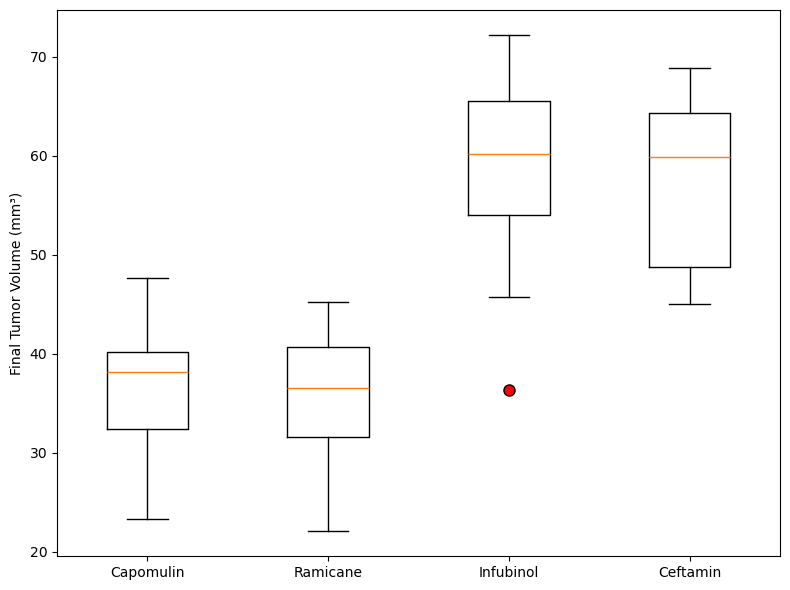

In [15]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group
fig, ax = plt.subplots(figsize=(8, 6))
box = ax.boxplot(
    tumor_vol_data,
    labels=treatments,
    flierprops=dict(marker='o', markerfacecolor='red', markersize=8)  # Filled red marker for outliers
)

# Set title and labels for the box plot
ax.set_ylabel('Final Tumor Volume (mm³)')

# Display the box plot
plt.tight_layout()
plt.show()

## Line and Scatter Plots

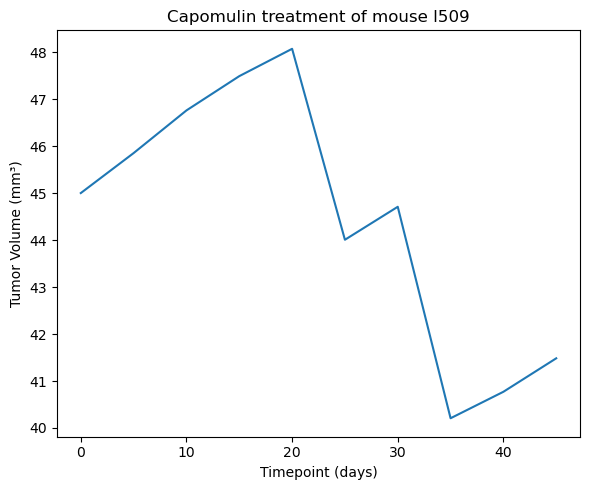

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_mouse_data = merged_data.loc[merged_data['Mouse ID'] == 'l509']

# Generate a line plot of tumor volume vs. time point for mouse 'l509'
plt.figure(figsize=(6, 5))  # Adjust the size to be similar to the example
plt.plot(
    capomulin_mouse_data['Timepoint'],
    capomulin_mouse_data['Tumor Volume (mm3)'],
)

# Set the title and labels for the plot
plt.title('Capomulin treatment of mouse l509')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm³)')

# Display the line plot
plt.tight_layout()
plt.show()

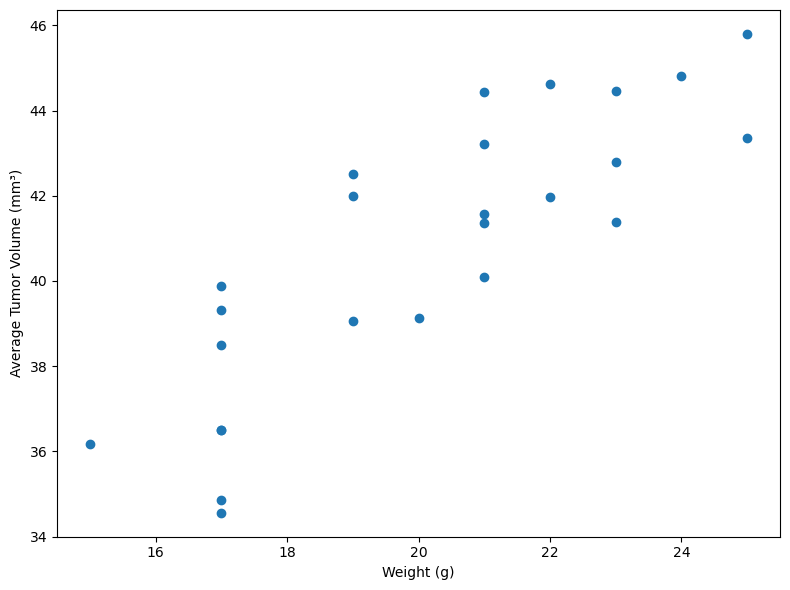

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_data = merged_data.loc[merged_data['Drug Regimen'] == 'Capomulin']

# Calculate the average tumor volume for each mouse
avg_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

# Get the corresponding weight for each mouse
mouse_weight = capomulin_data.groupby('Mouse ID')['Weight (g)'].mean()

# Generate a scatter plot of mouse weight vs. average tumor volume
plt.figure(figsize=(8, 6))
plt.scatter(mouse_weight, avg_tumor_volume)

# Set title and labels for the plot
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm³)')

# Display the scatter plot
plt.tight_layout()
plt.show()

## Correlation and Regression

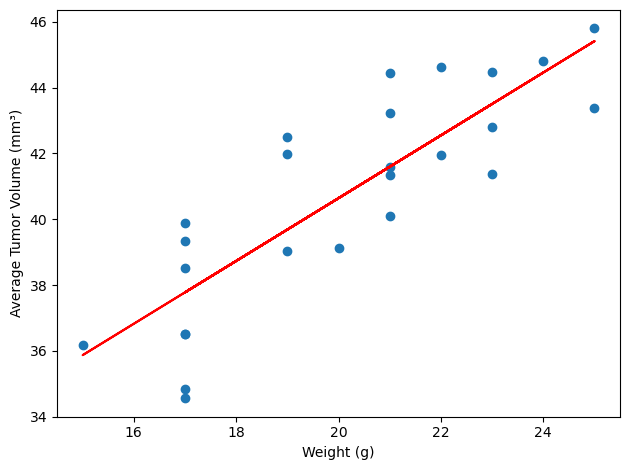

The correlation between mouse weight and the average tumor volume is 0.84


In [18]:
# Calculate the correlation coefficient for mouse weight vs. average tumor volume (Capomulin)
correlation = mouse_weight.corr(avg_tumor_volume)

# Perform linear regression for mouse weight vs. average tumor volume
slope, intercept, r_value, p_value, std_err = st.linregress(mouse_weight, avg_tumor_volume)

# Generate the linear regression model
regression_line = slope * mouse_weight + intercept

# Plot the scatter plot with the regression line
plt.scatter(mouse_weight, avg_tumor_volume)
plt.plot(mouse_weight, regression_line, color='red')

# Set title and labels for the plot
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm³)')


# Display the scatter plot with the linear regression line
plt.tight_layout()
plt.show()

# Print the correlation statement
print(f"The correlation between mouse weight and the average tumor volume is {correlation:.2f}")